In [3]:
from fenics import *
def q(u):
    return 1 + u**2
import sympy as sym
x,y = sym.symbols('x[0],x[1]')
u = 1 + x+ 2*y
f = - sym.diff(q(u) *sym.diff( u , x ) , x ) - sym.diff(q(u ) *sym.diff( u , y ) , y )
f = sym.simplify( f )
u_code = sym.printing.ccode( u )
f_code = sym.printing.ccode( f )
print(' u=', u_code )
print( 'f='  , f_code )

 u= x[0] + 2*x[1] + 1
f= -10*x[0] - 20*x[1] - 10


In [9]:
nx= ny=8
mesh = UnitSquareMesh(nx,ny)  # 在单位域进行网格划分
V = FunctionSpace(mesh,'P',1)
u_D = Expression(u_code,degree=1)
def boundary ( x , on_boundary ) :
     return on_boundary
bc = DirichletBC(V, u_D, boundary )

u = Function(V)
v = TestFunction(V)
f = Expression(f_code,degree=1)
F = q(u)*dot(grad(u),grad(v))*dx - f*v*dx

solve(F==0,u,bc)

    Calling FFC just-in-time (JIT) compiler, this may take some time.
    Calling FFC just-in-time (JIT) compiler, this may take some time.


u = x[0] + 2*x[1] + 1
f = -10*x[0] - 20*x[1] - 10
error_max =  0.0


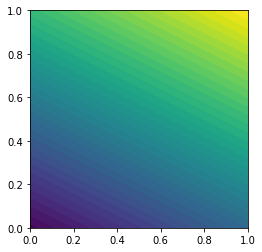

In [11]:
"""
FEniCS tutorial demo program: Nonlinear Poisson equation.

  -div(q(u)*grad(u)) = f   in the unit square.
                   u = u_D on the boundary.
"""

from __future__ import print_function

# Warning: from fenics import * will import both `sym` and
# `q` from FEniCS. We therefore import FEniCS first and then
# overwrite these objects.
from fenics import *

def q(u):
    "Return nonlinear coefficient"
    return 1 + u**2

# Use SymPy to compute f from the manufactured solution u
import sympy as sym
x, y = sym.symbols('x[0], x[1]')
u = 1 + x + 2*y
f = - sym.diff(q(u)*sym.diff(u, x), x) - sym.diff(q(u)*sym.diff(u, y), y)
f = sym.simplify(f)
u_code = sym.printing.ccode(u)
f_code = sym.printing.ccode(f)
print('u =', u_code)
print('f =', f_code)

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression(u_code, degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = Function(V)  # Note: not TrialFunction!
v = TestFunction(V)
f = Expression(f_code, degree=2)
F = q(u)*dot(grad(u), grad(v))*dx - f*v*dx

# Compute solution
solve(F == 0, u, bc)

# Plot solution
plot(u)

import numpy as np
# Compute maximum error at vertices. This computation illustrates
# an alternative to using compute_vertex_values as in poisson.py.
u_e = interpolate(u_D, V)
import numpy as np
error_max = np.abs(u_e.vector().get_local()- u.vector().get_local()).max()
print('error_max = ', error_max)

